In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

def contour(f, x, y, level = np.logspace(0, 5, 35)):
	fig, ax = plt.subplots(figsize=(8, 8))

	ax.contour(x, y, f(x,y), levels=level, norm=LogNorm(), cmap=plt.cm.jet)

	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

def contour_with_quiver(f, x, y, grad_x, grad_y, norm=LogNorm(), level = np.logspace(0, 5, 35),
	minima=None):
	dz_dx = grad_x(x,y)
	dz_dy = grad_y(x,y)

	fig, ax = plt.subplots(figsize=(6, 6))

	ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)
	if minima is not None:
		ax.plot(*minima, 'r*', markersize=18)
	ax.quiver(x, y, -dz_dx, -dz_dy, alpha=.5)
	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

def surf(f, x, y, norm=LogNorm(), minima=None):
	fig = plt.figure(figsize=(8, 5))
	ax = plt.axes(projection='3d', elev=50, azim=-50)

	ax.plot_surface(x, y, f(x,y), norm=norm, rstride=1, cstride=1,
	                edgecolor='none', alpha=.8, cmap=plt.cm.jet)

	if minima is not None:
		ax.plot(*minima, f(*minima), 'r*', markersize=10)

	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')
	ax.set_zlabel('$z$')

	plt.show()

def contour_with_path(f, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
	fig, ax = plt.subplots(figsize=(6, 6))

	ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)
	ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
	if minima is not None:
		ax.plot(*minima, 'r*', markersize=18)

	ax.set_xlabel('$x$')
	ax.set_ylabel('$y$')

	# ax.set_xlim((xmin, xmax))
	# ax.set_ylim((ymin, ymax))

	plt.show()

In [3]:
def f(x):
  return x**2-4*x+6

def grad_fx(x):
  return 2*x-4

def steepest_descent(func, grad_func, x0, learnig_rate = 0.01, Maxlter = 10, verbose = True):
    paths = []
    for i in range(Maxlter):
        x1 = x0 - learnig_rate * grad_func(x0)
        if verbose:
            print('{0:03d} : {1:4.3f}, {2:4.2E}'.format(i,x1,func(x1)))
        x0=x1
        paths.append(x0)
    return(x0,func(x0),paths)

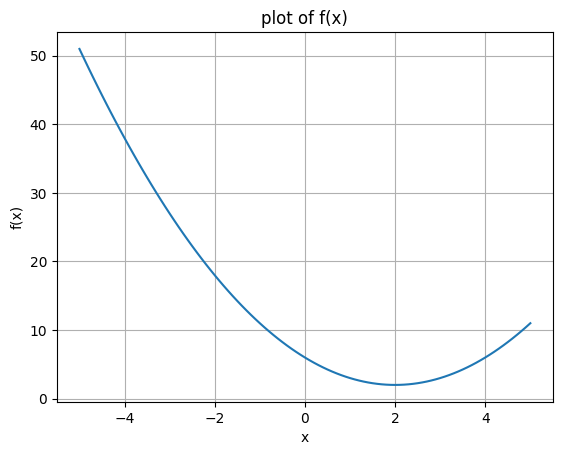

In [4]:
NumberOfPoints = 101
x = np.linspace(-5,5,NumberOfPoints)
fx = f(x)
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.show()

In [5]:
xid = np.argmin(fx)
xopt = x[xid]
print(xopt,f(xopt))

2.0 2.0


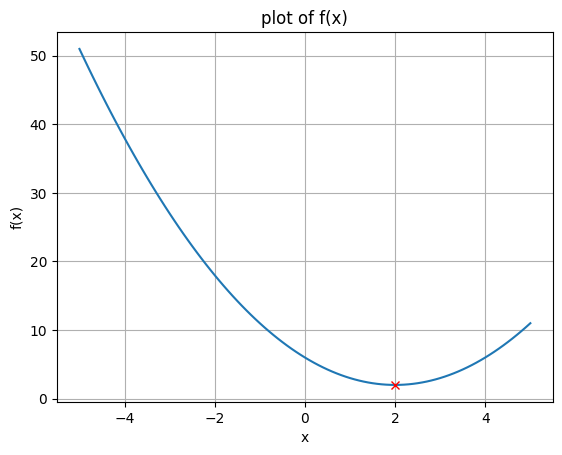

In [8]:
plt.plot(x,fx)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(xopt,f(xopt), 'xr')
plt.show()

In [9]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 0.0, learnig_rate=1.2)

000 : 4.800, 9.84E+00
001 : -1.920, 1.74E+01
002 : 7.488, 3.21E+01
003 : -5.683, 6.10E+01
004 : 12.756, 1.18E+02
005 : -13.059, 2.29E+02
006 : 23.083, 4.46E+02
007 : -27.516, 8.73E+02
008 : 43.322, 1.71E+03
009 : -55.851, 3.35E+03


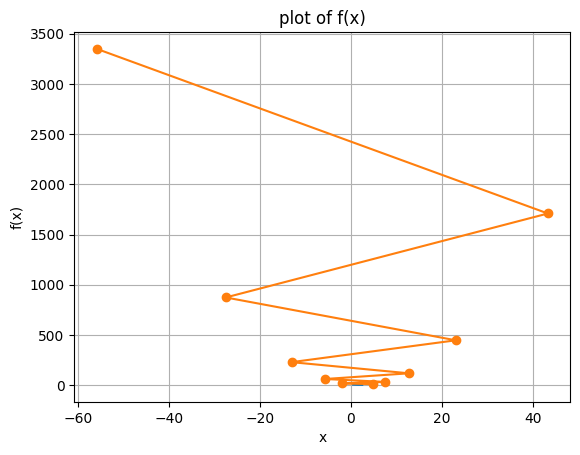

In [10]:
x=np.linspace(0.5,2.5,1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')

plt.plot(paths,f(paths), 'o-')
plt.show()

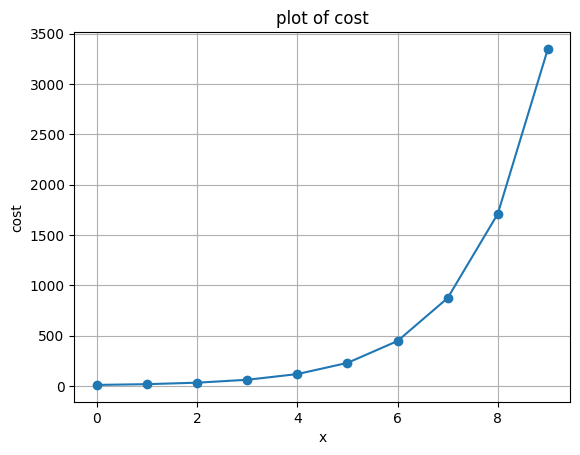

In [11]:
plt.plot(f(paths),'o-')
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [12]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learnig_rate=1)

000 : 3.000, 3.00E+00
001 : 1.000, 3.00E+00
002 : 3.000, 3.00E+00
003 : 1.000, 3.00E+00
004 : 3.000, 3.00E+00
005 : 1.000, 3.00E+00
006 : 3.000, 3.00E+00
007 : 1.000, 3.00E+00
008 : 3.000, 3.00E+00
009 : 1.000, 3.00E+00


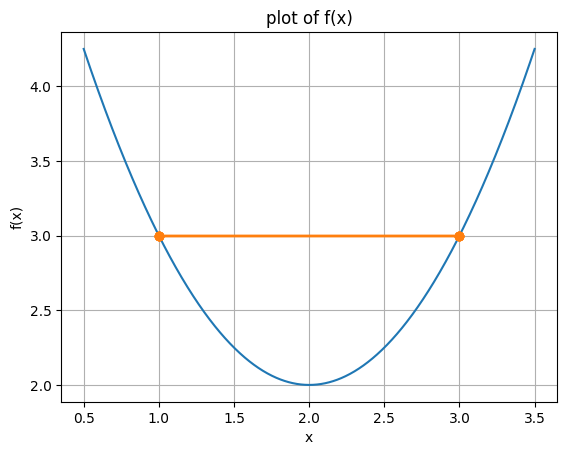

In [13]:
x=np.linspace(0.5,3.5,1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.plot(paths, f(paths),'o-')

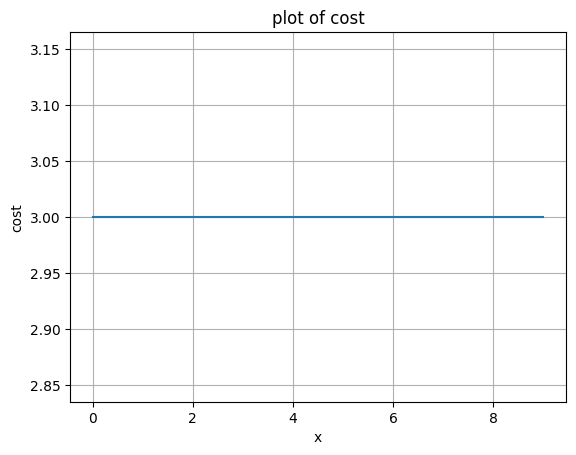

In [14]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [15]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 1.0, learnig_rate=0.001)

000 : 1.002, 3.00E+00
001 : 1.004, 2.99E+00
002 : 1.006, 2.99E+00
003 : 1.008, 2.98E+00
004 : 1.010, 2.98E+00
005 : 1.012, 2.98E+00
006 : 1.014, 2.97E+00
007 : 1.016, 2.97E+00
008 : 1.018, 2.96E+00
009 : 1.020, 2.96E+00


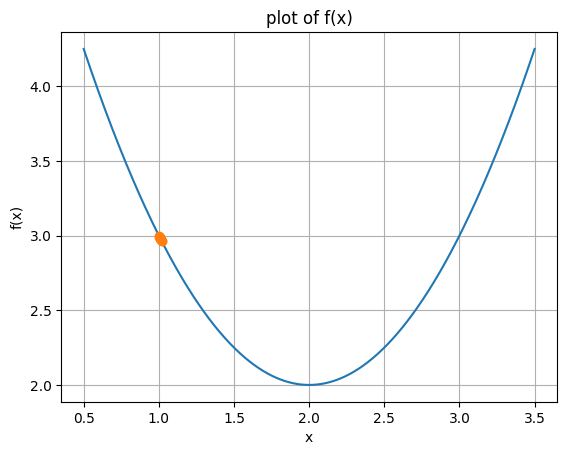

In [16]:
x=np.linspace(0.5,3.5,1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.plot(paths, f(paths),'o-')
plt.show()

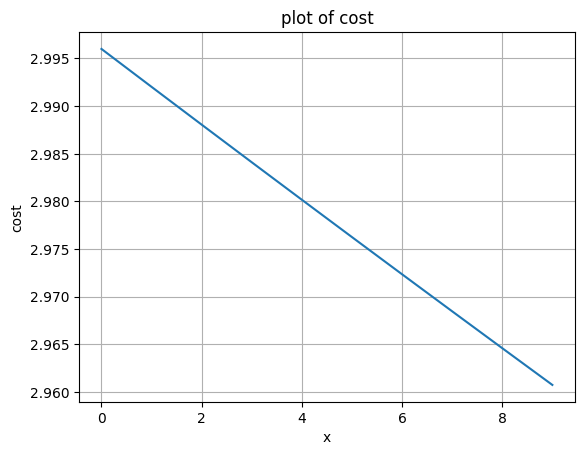

In [17]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [18]:
xopt, fopt, paths = steepest_descent(f, grad_fx, 3.0, learnig_rate=0.9)

000 : 1.200, 2.64E+00
001 : 2.640, 2.41E+00
002 : 1.488, 2.26E+00
003 : 2.410, 2.17E+00
004 : 1.672, 2.11E+00
005 : 2.262, 2.07E+00
006 : 1.790, 2.04E+00
007 : 2.168, 2.03E+00
008 : 1.866, 2.02E+00
009 : 2.107, 2.01E+00


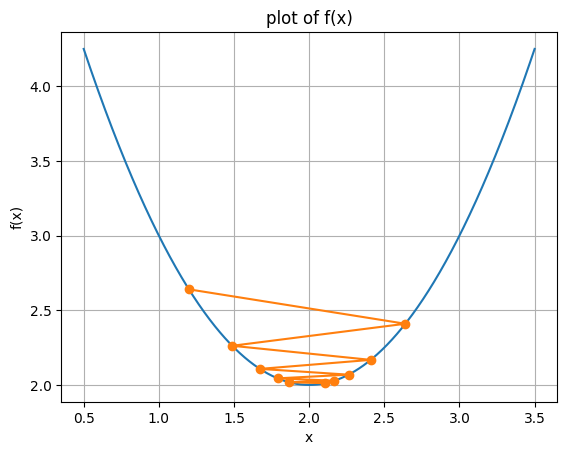

In [19]:
x=np.linspace(0.5,3.5,1000)
paths = np.array(paths)
plt.plot(x,f(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('plot of f(x)')
plt.plot(paths, f(paths),'o-')
plt.show()

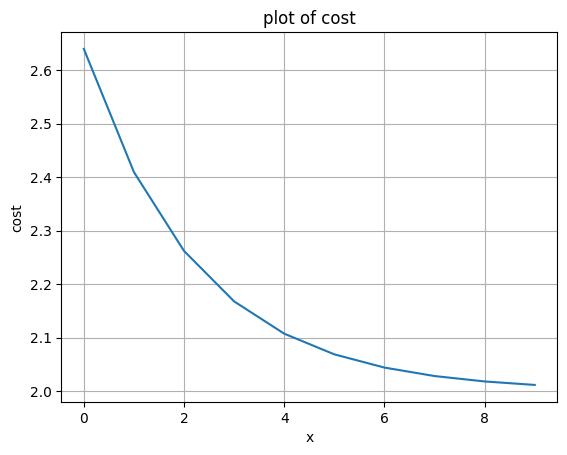

In [20]:
plt.plot(f(paths))
plt.grid()
plt.xlabel('x')
plt.ylabel('cost')
plt.title('plot of cost')
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

xmin, xmax, xstep = -4.0, 4.0, .25
ymin, ymax, ystep = -4.0, 4.0, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep),
                   np.arange(ymin, ymax + ystep, ystep))

f = lambda x, y: (x - 2)**2 + (y - 2)**2
z = f(x, y)
minima = np.array([2., 2.])

f(*minima)
# f(minima[0], minima[1])


np.float64(0.0)

[2. 2.] [[2.]
 [2.]]


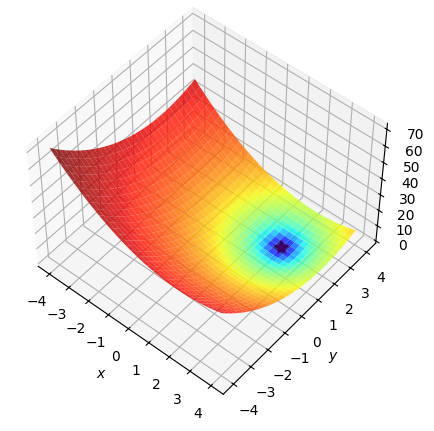

In [22]:
minima_ = minima.reshape(-1,1)
print(minima,minima_)
surf(f,x,y,minima=minima_)

In [23]:
grad_f_x = lambda x, y : 2*(x-2)
grad_f_y = lambda x, y : 2*(y-2)

<ipython-input-1-da74dc1169b7>:26: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


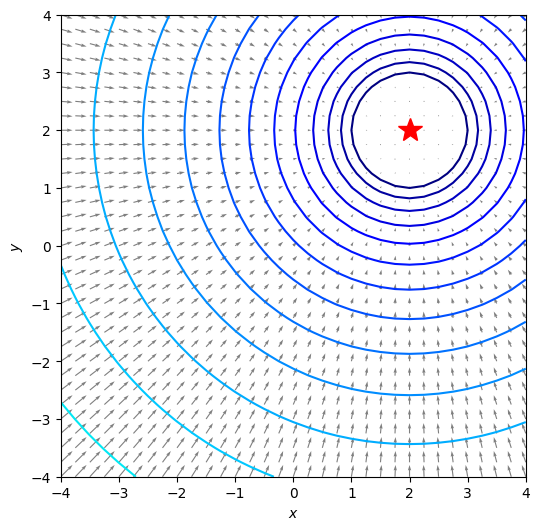

In [24]:
contour_with_quiver(f,x,y,grad_f_x,grad_f_y,minima=minima_)

In [25]:
def steepest_descent_twod(func, gradx, grady, x0, MaxIter=10, learning_rate=0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]

    for i in range(MaxIter):
        grad = np.array([gradx(*x0), grady(*x0)])
        x1 = x0 - learning_rate * grad
        fval = f(*x1)

        if verbose:
            print(i, x1, fval)

        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)

    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)

    return (x0, fval, paths, fval_paths)

In [26]:
x0 = np.array([-2.,-2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


<ipython-input-1-da74dc1169b7>:57: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


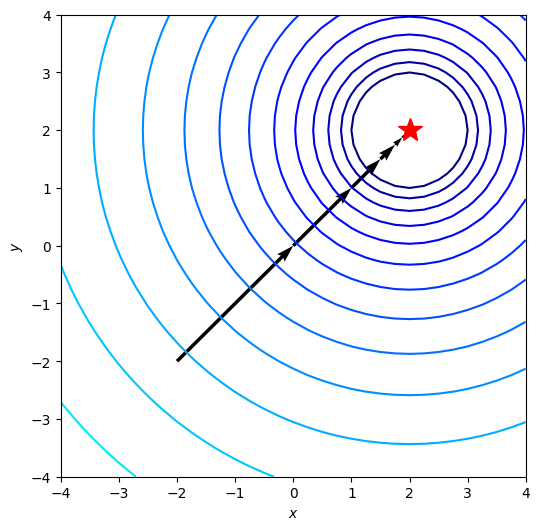

In [29]:
contour_with_path(f ,x ,y ,paths ,minima=np.array([[2],[2]]))

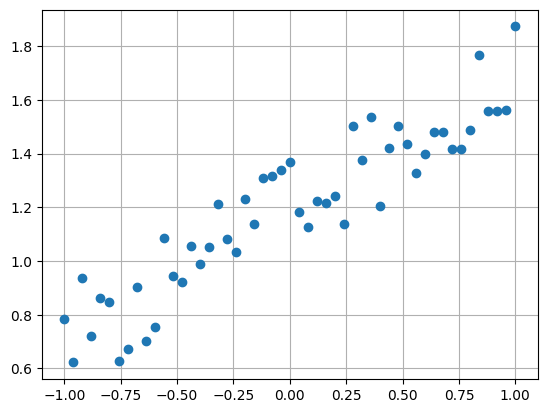

In [30]:
np.random.seed(320)
x_train = np.linspace(-1,1,51)
f = lambda x:0.5* x + 1.0
y_train = f(x_train) + 0.4*np.random.rand(len(x_train))
plt.plot(x_train,y_train,'o')
plt.grid()
plt.show()

In [32]:
np.random.seed(303)
shuffle_id = np.arange(0, len(x_train))
np.random.shuffle(shuffle_id)
x_train = x_train[shuffle_id]
y_train = y_train[shuffle_id]

In [33]:
def loss(w,x_set, y_set):
  N=len(x_set)
  val = 0.0
  for i in range(len(x_set)):
    val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i])**2
  return val/N

def loss_grad(w, x_set, y_set):
  N=len(x_set)
  val = np.zeros(len(w))
  for i in range(len(x_set)):
    er = w[0] *x_set[i] + w[1] - y_set[i]
    val += er * np.array([x_set[i],1.0])
  return val/N

In [34]:
def generate_batches(batch_size, features, labels):
    assert len(features) == len(labels)
    output_batches = []

    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)

    return output_batches

In [35]:
batch_size = 10
lr = 0.01
MaxEpochs = 51

alpha =.9

In [36]:
w0 = np.array([4.0,-1.0])
path_sgd = []
for epoch in range(MaxEpochs):
  if epoch % 10 == 0:
    print(epoch, w0, loss(w0, x_train, y_train))
  for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
    path_sgd.append(w0)
    grad = loss_grad(w0, x_batch, y_batch)
    w1 = w0 - lr * grad
    w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [3.36748902 0.05509539] 2.114661863449622
20 [2.85966989 0.6217412 ] 1.163370846765917
30 [2.4470799  0.92319527] 0.7232771480224915
40 [2.10909494 1.08113942] 0.4806179088890847
50 [1.83067577 1.16181581] 0.3296288926560264


In [37]:
w0 = np.array([4.0,-1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
  if epoch % 10 == 0:
    print(epoch, w0, loss(w0, x_train, y_train))
  for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
    path_mm.append(w0)
    grad = loss_grad(w0, x_batch, y_batch)
    velocity = alpha * velocity + lr * grad
    w1 = w0 - velocity
    w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.83302959 1.20678435] 0.03003201597220386
20 [0.4684414 1.2013792] 0.006758172467077168
30 [0.46435817 1.19757988] 0.0067419444174559254
40 [0.46490866 1.19741605] 0.006741085572109452
50 [0.46493098 1.19741456] 0.006741066002074992


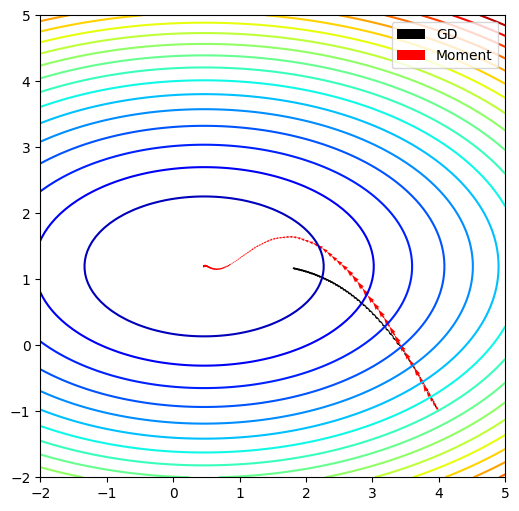

In [38]:
W0 = np.linspace(-2,5,101)
W1 = np.linspace(-2,5,101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
  for j in range(W0.shape[1]):
    wij = np.array([W0[i,j], W1[i,j]])
    LOSSW[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet, levels=np.linspace(0, max(LOSSW.flatten()), 20))

paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)

ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Moment'])
plt.show()


In [39]:
batch_size = 10
lr = 1.5
MaxEpochs = 51

epsilon = lr
delta = 1E-7

In [40]:
w0 = np.array([4.0, -1.0])
path_sgd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))

    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr * grad
        w0 = w1


0 [ 4. -1.] 4.579314993864028
10 [0.43799693 1.21638241] 0.007111813386801515
20 [0.43799693 1.21638241] 0.007111813386800047
30 [0.43799693 1.21638241] 0.007111813386800047
40 [0.43799693 1.21638241] 0.007111813386800047
50 [0.43799693 1.21638241] 0.007111813386800047


In [41]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagd = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))

    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = - epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1


0 [ 4. -1.] 4.579314993864028
10 [0.45317168 1.1999705 ] 0.006782855900139488
20 [0.45321417 1.19996836] 0.006782642181875964
30 [0.45325749 1.19996633] 0.006782425598655102
40 [0.4533003  1.19996428] 0.006782212022003741
50 [0.45334261 1.19996221] 0.006782001383533379


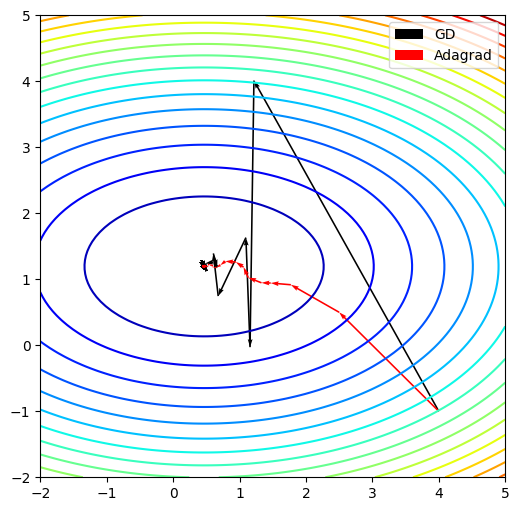

In [42]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet,
           levels=np.linspace(0, np.max(LOSSW.flatten()), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adagd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['GD', 'Adagrad'])
plt.show()

In [43]:
MaxEpochs = 51
batch_size = 10

epsilon = 0.25
delta = 1e-6

rho = 0.9

In [44]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_adagrad = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch,w0,loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0.copy())
        grad = loss_grad(w0, x_batch, y_batch)
        r = r + grad * grad
        delw = -epsilon / (delta + np.sqrt(r)) * grad
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [1.6153188  1.01038019] 0.25234878363881025
20 [0.98465014 1.19069321] 0.053196556736343825
30 [0.70781172 1.20756929] 0.01686965476866836
40 [0.57927308 1.20449025] 0.00896812491001545
50 [0.51875391 1.20119494] 0.007221233784661749


In [47]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0,loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1 - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.39349326 1.23710405] 0.008560244863137834
20 [0.36918551 1.25040353] 0.009930444130181078
30 [0.36924013 1.2503992 ] 0.009928352276478295
40 [0.36924089 1.25039879] 0.009928303969348361
50 [0.36924089 1.25039879] 0.009928303832625024


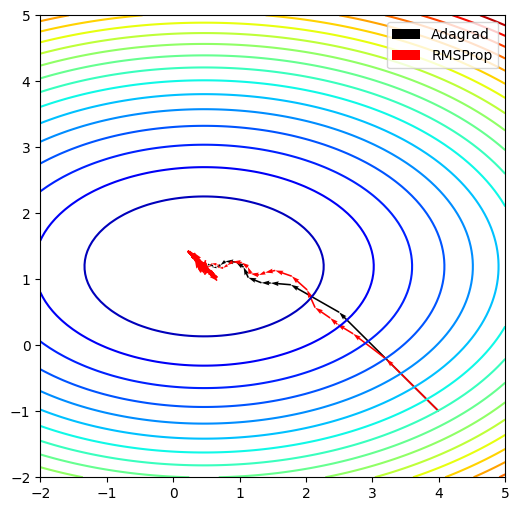

In [49]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet,
           levels=np.linspace(0, np.max(LOSSW.flatten()), 20))

paths = path_adagd
paths = np.array(np.matrix(paths).T)

ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_rmsprop
paths = np.array(np.matrix(paths).T)

ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['Adagrad', 'RMSProp'])
plt.show()

In [50]:
MaxEpochs = 51
batch_size = 10
epsilon = 0.1
delta = 1e-6

rho = 0.9

delta_adam = 1e-8
rho1 = 0.9
rho2 = 0.999

In [51]:
w0 = np.array([4.0, -1.0])
r = np.zeros_like(w0)
path_rmsprop = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch,w0,loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0.copy())
        grad = loss_grad(w0, x_batch, y_batch)
        r = rho * r + (1. - rho) * grad * grad
        delw = -epsilon * grad / np.sqrt(delta + r)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.46456558 1.20512106] 0.006789718705465277
20 [0.43674458 1.21300852] 0.007058189427519757
30 [0.43674954 1.21300674] 0.007058105455299312
40 [0.43674954 1.21300674] 0.007058105454484383
50 [0.43674954 1.21300674] 0.007058105454484373


In [52]:
w0 = np.array([4.0, -1.0])
s = np.zeros_like(w0)
r = np.zeros_like(w0)
path_adam = []
t = 0

for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch,w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0.copy())
        grad = loss_grad(w0, x_batch, y_batch)

        s = rho1 * s + (1. - rho1) * grad
        r = rho2 * r + (1. - rho2) * (grad * grad)
        t += 1

        shat = s / (1. - rho1**t)
        rhat = r / (1. - rho2**t)

        delw = -epsilon * shat / (np.sqrt(rhat) + delta_adam)
        w1 = w0 + delw
        w0 = w1

0 [ 4. -1.] 4.579314993864028
10 [0.50374253 1.27270463] 0.009991311458367447
20 [0.46748373 1.20122063] 0.00675684656345232
30 [0.46421774 1.1973704 ] 0.006741555264123772
40 [0.46458265 1.19746515] 0.0067414585756450235
50 [0.46452398 1.19749213] 0.006741575079068978


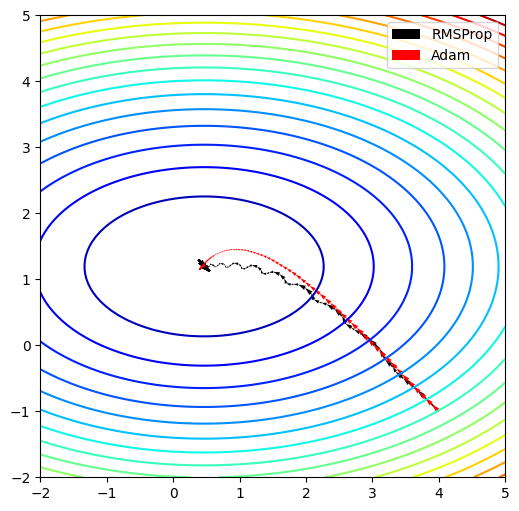

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(W0, W1, LOSSW, cmap=plt.cm.jet,
           levels=np.linspace(0, np.max(LOSSW.flatten()), 20))

paths = path_rmsprop
paths = np.array(np.matrix(paths)).T
ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='k')

paths = path_adam
paths = np.array(np.matrix(paths)).T
ax.quiver(paths[0, :-1], paths[1, :-1],
          paths[0, 1:] - paths[0, :-1],
          paths[1, 1:] - paths[1, :-1],
          scale_units='xy', angles='xy', scale=1, color='r')

plt.legend(['RMSProp', 'Adam'])
plt.show()